# ARIMA
#### by Christopher Darren 00000054804

### Importing Libraries 📚

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA

In [2]:
print(sns.__version__)

0.12.2


### Data Understanding 👓

In [71]:
df = pd.read_csv('./dataset/playerdata.csv', index_col=['DateTime'], parse_dates=['DateTime'])
df.head(5)

,Players,Average Players
DateTime,,
2011-11-30,680.0,NaN
2011-12-01,NaN,NaN
2011-12-02,NaN,NaN
2011-12-03,NaN,NaN
2011-12-04,NaN,NaN


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4293 entries, 2011-11-30 to 2023-08-31
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Players          4130 non-null   float64
 1   Average Players  343 non-null    float64
dtypes: float64(2)
memory usage: 100.6 KB


In [73]:
df.describe()

,Players,Average Players
count,4.130000e+03,3.430000e+02
mean,5.824735e+05,8.267761e+05
std,3.644661e+05,1.822924e+05
min,2.040000e+02,5.401400e+05
25%,3.720188e+05,6.752670e+05
50%,5.888870e+05,8.309250e+05
75%,8.322902e+05,9.347175e+05
max,1.818773e+06,1.306150e+06


In [74]:
df.shape

(4293, 2)

In [57]:
# df['DateTime'] = pd.to_datetime(df['DateTime'])

In [69]:
# df['DateTime'] = df['DateTime'].dt.date


In [70]:
# cutoff_date = "2019-01-01 00:00:00"
# df = df.loc[df["DateTime"] >= cutoff_date]

TypeError: '>=' not supported between instances of 'datetime.date' and 'str'

In [75]:
# df

In [76]:
print(df.dtypes)

Players            float64
Average Players    float64
dtype: object


In [85]:
csdf = df.drop(['Average Players'], axis=1)
csdf

,Players
DateTime,
2011-11-30,680.0
2011-12-01,NaN
2011-12-02,NaN
2011-12-03,NaN
2011-12-04,NaN
...,...
2023-08-27,1369511.0
2023-08-28,1264878.0
2023-08-29,1251061.0


In [78]:
csdf = pd.DataFrame(df)

In [217]:
# csdf[['Players','Average Players']] = csdf[['Players','Average Players']].fillna(0)
# csdf.head(10)

In [86]:
csdf['Players'] = csdf['Players'].fillna(0)
csdf.head(10)

,Players
DateTime,
2011-11-30,680.0
2011-12-01,0.0
2011-12-02,0.0
2011-12-03,0.0
2011-12-04,0.0
2011-12-05,0.0
2011-12-06,0.0
2011-12-07,0.0
2011-12-08,0.0


In [87]:
csdf.head(5)

,Players
DateTime,
2011-11-30,680.0
2011-12-01,0.0
2011-12-02,0.0
2011-12-03,0.0
2011-12-04,0.0


In [88]:
print(csdf.head())

            Players
DateTime           
2011-11-30    680.0
2011-12-01      0.0
2011-12-02      0.0
2011-12-03      0.0
2011-12-04      0.0


In [89]:
csdf.isnull().sum()

Players    0
dtype: int64

In [90]:
csdf.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4293 entries, 2011-11-30 to 2023-08-31
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Players  4293 non-null   float64
dtypes: float64(1)
memory usage: 67.1 KB


<Axes: xlabel='DateTime'>

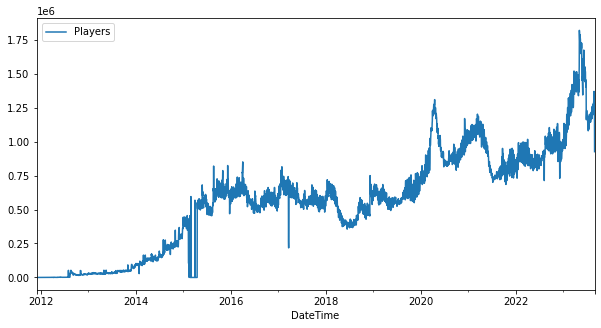

In [91]:
csdf.plot(figsize=(10,5))

In [15]:
# sns.lineplot(data=csdf, x="DateTime", y="Average Players")
# plt.title("Average Players on CSGO from 2012-now")
# plt.show()

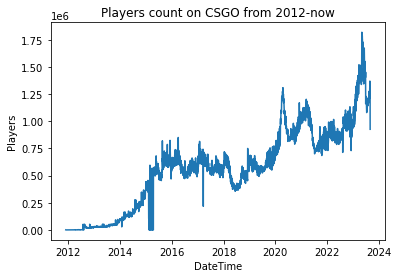

In [92]:
sns.lineplot(data=csdf, x="DateTime", y="Players")
plt.title("Players count on CSGO from 2012-now")
plt.show()

In [23]:
# corr = csdf.corr()
# plt.figure(figsize=(12,10))
# sns.heatmap(corr, annot=True)

### Check Stationary Data 🚉

ADF Statistic: -1.6320238043353077
p-value: 0.4664315515738108


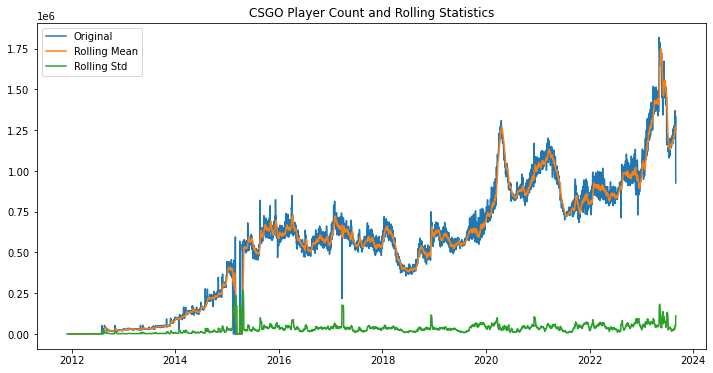

In [93]:
# Menggunakan teknik Dickey-Fuller test
result = adfuller(csdf['Players'])
print("ADF Statistic:", result[0])
print("p-value:", result[1])

# Membuat plot grafik rolling mean and standard deviation
rolling_mean = csdf['Players'].rolling(window=12).mean()
rolling_std = csdf['Players'].rolling(window=12).std()

plt.figure(figsize=(12, 6))
plt.plot(csdf['Players'], label='Original')
plt.plot(rolling_mean, label='Rolling Mean')
plt.plot(rolling_std, label='Rolling Std')
plt.legend(loc = 'best')
plt.title('CSGO Player Count and Rolling Statistics')
plt.show()

In [94]:
#stationary 
def ad_test(csdf):
    csdftest = adfuller(csdf, autolag='AIC')
    print("1. ADF Stats : ", csdftest[0])
    print("2. P-Value : ", csdftest[1])
    print("3. lags : ", csdftest[2])
    print("4. num of observations : ", csdftest[3])
    print("5. critical values : ")
    for key , val in csdftest[4].items():
        print("\t", key, ": ",val)

In [95]:
ad_test(csdf['Players'])

1. ADF Stats :  -1.6320238043353077
2. P-Value :  0.4664315515738108
3. lags :  31
4. num of observations :  4261
5. critical values : 
	 1% :  -3.4318856122567074
	 5% :  -2.8622185486666925
	 10% :  -2.567131196722582


C:\Users\Darren\AppData\Roaming\Python\Python39\site-packages\pandas\core\internals\blocks.py:329: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


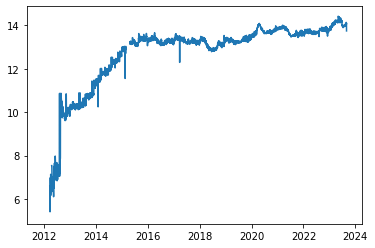

In [96]:
#membuat log

csdf_log = np.log(csdf)
csdf_log = csdf_log.dropna()
plt.plot(csdf_log)


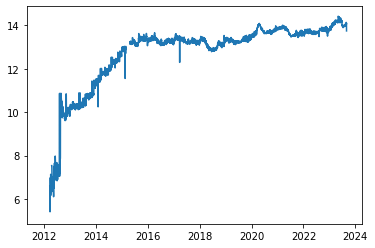

In [97]:
csdf_log = csdf_log.fillna(method='ffill')  # Forward fill missing values
plt.plot(csdf_log)


In [98]:
#test run ke 2 untuk ADF

def stationary(timeseries):

    # Membuat plot grafik rolling mean and standard deviation
    rolling_mean = timeseries.rolling(window=12).mean()
    rolling_std = timeseries.rolling(window=12).std()

    #plot figure
    plt.figure(figsize=(12, 6))
    plt.plot(timeseries, color='blue', label='Original')
    plt.plot(rolling_mean, color='purple', label='Rolling Mean')
    plt.plot(rolling_std, color='magenta', label='Rolling Std')
    plt.legend(loc = 'best')
    plt.title('CSGO Player Count and Rolling Statistics')
    plt.show()

    # Menggunakan teknik Dickey-Fuller test
    result = adfuller(timeseries['Players'])
    print("ADF Statistic: {}".format(result[0]))
    print("p-value:".format(result[1]))
    print("Critical values : ")
    for key, value in result[4].items():
        print("\t{}: {}".format(key, value))
    if result[0] < result [4]["5%"]:
        print("Reject H0- Time series is Stationary")
    else:
        print("Failed to reject H0 - Time series is Non-Stationary")


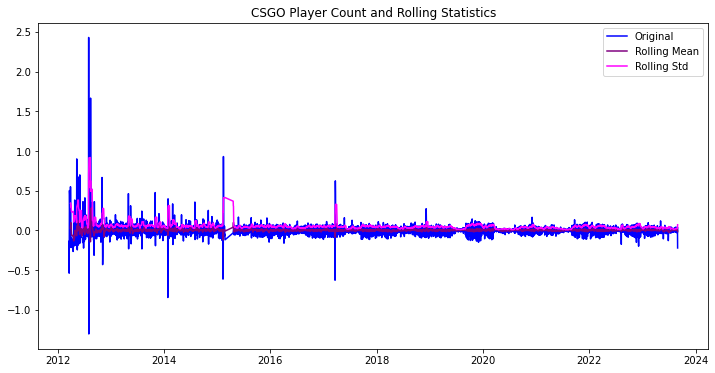

ADF Statistic: -13.727279671990578
p-value:
Critical values : 
	1%: -3.431951814918001
	5%: -2.862247794094088
	10%: -2.5671467656395834
Reject H0- Time series is Stationary


In [99]:
# Calculate and subtract a moving average
rolling_mean = csdf_log.rolling(window=3).mean()
stationary_data_mean = csdf_log - rolling_mean
stationary_data_mean.dropna(inplace=True)

stationary(stationary_data_mean)

### Optimal Parameter

C:\Users\Darren\AppData\Local\Temp\ipykernel_10744\180388553.py:2: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  plt.show()


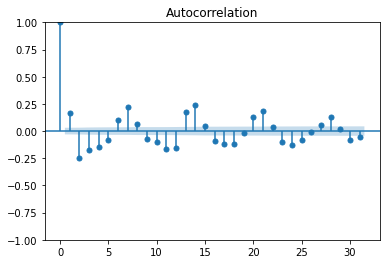

In [100]:
plt = sm.graphics.tsa.plot_acf(stationary_data_mean['Players'], lags=31)
plt.show()

C:\Users\Darren\AppData\Local\Temp\ipykernel_10744\3490614546.py:2: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  plt.show()


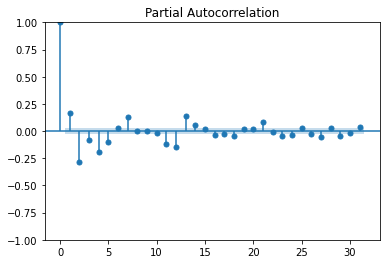

In [101]:
plt = sm.graphics.tsa.plot_pacf(stationary_data_mean['Players'], lags=31)
plt.show()

In [129]:
from pmdarima import auto_arima

import warnings
warnings.filterwarnings("ignore")

In [103]:
model= ARIMA(csdf, order=(5,1,5))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                Players   No. Observations:                 4293
Model:                 ARIMA(5, 1, 5)   Log Likelihood              -51104.868
Date:                Tue, 05 Sep 2023   AIC                         102231.735
Time:                        14:04:12   BIC                         102301.745
Sample:                    11-30-2011   HQIC                        102256.463
                         - 08-31-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9860      0.027     36.260      0.000       0.933       1.039
ar.L2         -1.5720      0.023    -68.497      0.000      -1.617      -1.527
ar.L3          1.0593      0.038     28.109      0.000       0.985       1.133
ar.L4         -1.1152      0.021    -52.654      0.000      -1.157      -1.074
ar.L5          0.1880      0.024      7.716      0.000       0.140       0.236
ma.L1         -1.3310      0.027    -49.837      0.000      -1.383      -1.279
ma.L2          1.7410      0.029     60.412      0.000       1.685       1.797
ma.L3         -1.4947      0.035    -42.440      0.000      -1.564      -1.426
ma.L4          1.2470      0.025     50.655      0.000       1.199       1.295
ma.L5         -0.4806      0.019    -25.524      0.000      -0.517      -0.444
sigma2      1.471e+09   1.54e-11   9.54e+19      0.000    1.47e+09    1.47e+09
===================================================================================
Ljung-Box (L1) (Q):                   0.40   Jarque-Bera (JB):            749717.98
Prob(Q):                              0.53   Prob(JB):                         0.00
Heteroskedasticity (H):               0.93   Skew:                             1.50
Prob(H) (two-sided):                  0.16   Kurtosis:                        67.68
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.62e+35. Standard errors may be unstable.
"""

In [30]:
check_arima = auto_arima(csdf['Players'], trace=True, suppress_warnings=True)
check_arima.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=103028.625, Time=2.26 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=104062.194, Time=0.07 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=104032.815, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=104011.031, Time=0.19 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=104060.294, Time=0.05 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=103475.065, Time=0.79 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=103387.091, Time=0.85 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=102772.253, Time=2.76 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=103272.049, Time=0.87 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=102557.557, Time=3.85 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=103114.370, Time=0.83 sec
 ARIMA(5,1,2)(0,0,0)[0] intercept   : AIC=102523.403, Time=4.98 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=102941.486, Time=1.08 sec
 ARIMA(5,1,3)(0,0,0)[0] intercept   : AIC=102511.464, Time=5.59 sec
 ARIM

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 4293
Model:               SARIMAX(5, 1, 5)   Log Likelihood              -51102.163
Date:                Tue, 05 Sep 2023   AIC                         102228.327
Time:                        10:34:36   BIC                         102304.701
Sample:                    11-30-2011   HQIC                        102255.303
                         - 08-31-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    499.1954    431.958      1.156      0.248    -347.427    1345.818
ar.L1          1.0201      0.027     37.754      0.000       0.967       1.073
ar.L2         -1.6038      0.022    -71.488      0.000      -1.648      -1.560
ar.L3          1.1100      0.038     29.488      0.000       1.036       1.184
ar.L4         -1.1470      0.021    -54.799      0.000      -1.188      -1.106
ar.L5          0.2187      0.025      8.898      0.000       0.171       0.267
ma.L1         -1.3650      0.026    -51.633      0.000      -1.417      -1.313
ma.L2          1.7738      0.028     62.991      0.000       1.719       1.829
ma.L3         -1.5426      0.035    -44.557      0.000      -1.610      -1.475
ma.L4          1.2743      0.024     52.746      0.000       1.227       1.322
ma.L5         -0.5001      0.018    -27.238      0.000      -0.536      -0.464
sigma2       1.47e+09      0.004   3.51e+11      0.000    1.47e+09    1.47e+09
===================================================================================
Ljung-Box (L1) (Q):                   0.49   Jarque-Bera (JB):            746879.00
Prob(Q):                              0.49   Prob(JB):                         0.00
Heteroskedasticity (H):               0.92   Skew:                             1.50
Prob(H) (two-sided):                  0.12   Kurtosis:                        67.56
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 5.92e+25. Standard errors may be unstable.
"""

In [104]:
from sklearn.model_selection import train_test_split

In [83]:
# X = csdf['DateTime']
# y = csdf['Players']

In [84]:
# X_train,X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

# print(train.shape, test.shape)

In [177]:
print(csdf.shape)
train = csdf.iloc[:-55]
test = csdf.iloc[-55:]
print(train.shape, test.shape)

(4293, 1)
(4238, 1) (55, 1)


In [178]:
model= ARIMA(train['Players'], order=(5,1,5))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                Players   No. Observations:                 4238
Model:                 ARIMA(5, 1, 5)   Log Likelihood              -50392.919
Date:                Tue, 05 Sep 2023   AIC                         100807.838
Time:                        14:24:32   BIC                         100877.706
Sample:                    11-30-2011   HQIC                        100832.532
                         - 07-07-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9674      0.027     35.599      0.000       0.914       1.021
ar.L2         -1.5528      0.024    -65.841      0.000      -1.599      -1.507
ar.L3          1.0221      0.039     26.540      0.000       0.947       1.098
ar.L4         -1.0984      0.021    -51.278      0.000      -1.140      -1.056
ar.L5          0.1682      0.025      6.850      0.000       0.120       0.216
ma.L1         -1.3044      0.027    -48.137      0.000      -1.358      -1.251
ma.L2          1.7043      0.031     55.664      0.000       1.644       1.764
ma.L3         -1.4329      0.038    -37.990      0.000      -1.507      -1.359
ma.L4          1.2150      0.026     47.484      0.000       1.165       1.265
ma.L5         -0.4532      0.019    -23.717      0.000      -0.491      -0.416
sigma2      1.433e+09    4.5e-11   3.19e+19      0.000    1.43e+09    1.43e+09
===================================================================================
Ljung-Box (L1) (Q):                   0.65   Jarque-Bera (JB):            784666.36
Prob(Q):                              0.42   Prob(JB):                         0.00
Heteroskedasticity (H):               0.85   Skew:                             1.97
Prob(H) (two-sided):                  0.00   Kurtosis:                        69.55
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.3e+35. Standard errors may be unstable.
"""

In [95]:
start = len(train)
end=len(train)+len(test)-1
params = results.params
pred=model.predict(start=start, end=end,typ="levels", params=params)
print(pred)
pred.index=csdf.index[start:end+1]
print(pred)

NotImplementedError: 

In [179]:
start=len(train)
end = len(train) + len(test) - 1

# Use the 'forecast()' method to make predictions
pred = results.forecast(steps=len(test))

# 'pred' contains the point forecasts
print(pred)

2023-07-08    1.216531e+06
2023-07-09    1.213931e+06
2023-07-10    1.197508e+06
2023-07-11    1.187194e+06
2023-07-12    1.169506e+06
2023-07-13    1.160484e+06
2023-07-14    1.186281e+06
2023-07-15    1.215732e+06
2023-07-16    1.212636e+06
2023-07-17    1.197211e+06
2023-07-18    1.187348e+06
2023-07-19    1.170586e+06
2023-07-20    1.162274e+06
2023-07-21    1.186602e+06
2023-07-22    1.214148e+06
2023-07-23    1.211274e+06
2023-07-24    1.196898e+06
2023-07-25    1.187489e+06
2023-07-26    1.171610e+06
2023-07-27    1.163955e+06
2023-07-28    1.186897e+06
2023-07-29    1.212661e+06
2023-07-30    1.209996e+06
2023-07-31    1.196596e+06
2023-08-01    1.187622e+06
2023-08-02    1.172582e+06
2023-08-03    1.165536e+06
2023-08-04    1.187167e+06
2023-08-05    1.211267e+06
2023-08-06    1.208796e+06
2023-08-07    1.196306e+06
2023-08-08    1.187746e+06
2023-08-09    1.173506e+06
2023-08-10    1.167021e+06
2023-08-11    1.187416e+06
2023-08-12    1.209958e+06
2023-08-13    1.207670e+06
2

In [181]:
start_date = '2023-09-1'
end_date = '2023-10-1'  # or any date in September you want to predict
future_dates = pd.date_range(start=start_date, end=end_date)

In [182]:
future_pred = results.forecast(steps=len(future_dates))

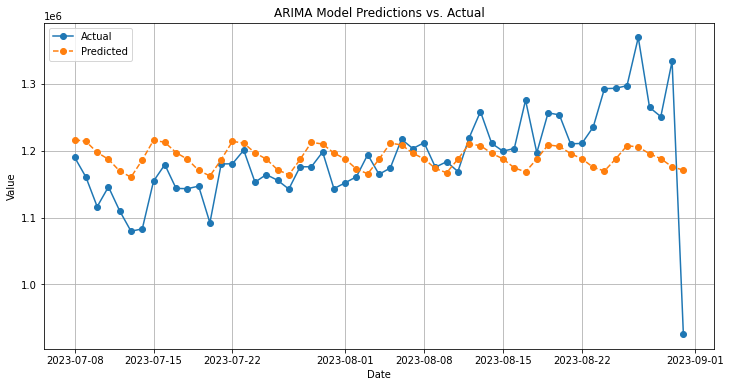

In [183]:
import matplotlib.pyplot as plt

# Assuming you have the actual values in 'test' and 'pred' contains the point forecasts
plt.figure(figsize=(12, 6))
plt.plot(test.index, test, label='Actual', marker='o')
plt.plot(test.index, pred, label='Predicted', linestyle='--', marker='o')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('ARIMA Model Predictions vs. Actual')
plt.legend()
plt.grid(True)
plt.show()


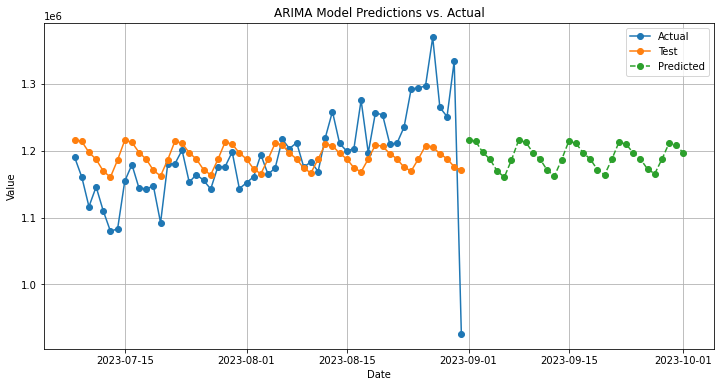

In [184]:
import matplotlib.pyplot as plt

# Assuming you have the actual values in 'test' and 'pred' contains the point forecasts
plt.figure(figsize=(12, 6))
plt.plot(test.index, test, label='Actual', marker='o')
plt.plot(test.index, pred, label='Test', marker='o')
plt.plot(future_dates, future_pred, label='Predicted', linestyle='--', marker='o')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('ARIMA Model Predictions vs. Actual')
plt.legend()
plt.grid(True)
plt.show()